In [11]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [6]:
df = pd.read_csv('data/train.csv', encoding='Windows-1252')

In [5]:
import chardet
with open('data/train.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7290615013529563, 'language': ''}

In [7]:
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [12]:
# Download necessary NLTK data files
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back to string
    return ' '.join(tokens)

# Apply preprocessing to the tweet column
df['cleaned_text'] = df['SentimentText'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jmattson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jmattson/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
df.head()

,ItemID,Sentiment,SentimentText,cleaned_text
0,1,0,is so sad for my APL frie...,sad apl friend
1,2,0,I missed the New Moon trail...,miss new moon trailer
2,3,1,omg its already 7:30 :O,omg alreadi
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cri ive dentist sinc s...
4,5,0,i think mi bf is cheating on me!!! ...,think mi bf cheat tt


In [14]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform the cleaned text
X = tfidf.fit_transform(df['cleaned_text'])
y = df['Sentiment']

# Display the shape of the feature matrix
print(X.shape)

(99989, 5000)


In [15]:
print(X)

  (0, 1704)	0.7242755560653328
  (0, 3753)	0.689510637253881
  (1, 4497)	0.6241902949893816
  (1, 2851)	0.5972818352756926
  (1, 2948)	0.37577220424908103
  (1, 2806)	0.3353149793918491
  (2, 139)	0.6924931853628378
  (2, 3082)	0.7214244161560035
  (3, 2794)	0.3110287053159818
  (3, 3457)	0.25900026783904356
  (3, 1034)	0.4191047044013621
  (3, 1779)	0.1610978581945682
  (3, 3947)	0.26422041668595353
  (3, 1157)	0.37937172910268996
  (3, 2295)	0.2203345146545339
  (3, 1025)	0.2710511144751954
  (3, 1915)	0.36356690811121856
  (3, 4051)	0.29684154521955813
  (3, 2186)	0.2802348844778125
  (4, 4536)	0.4955636760053912
  (4, 765)	0.4970527417206438
  (4, 446)	0.46225597523070855
  (4, 2767)	0.48251940412668437
  (4, 4387)	0.24667722427648378
  (5, 2878)	0.5979848911387112
  :	:
  (99983, 3574)	0.24728351721317882
  (99983, 1779)	0.20108571285223667
  (99984, 3630)	0.4982693215208304
  (99984, 12)	0.3844545851548527
  (99984, 3831)	0.35751121324435253
  (99984, 3402)	0.3761599404914765
  (

In [16]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7491
Precision: 0.7488
Recall: 0.7491
F1-Score: 0.7463

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.65      0.69      8750
           1       0.75      0.83      0.79     11248

    accuracy                           0.75     19998
   macro avg       0.75      0.74      0.74     19998
weighted avg       0.75      0.75      0.75     19998



In [17]:
# Initialize Naive Bayes classifier
nb_clf = MultinomialNB()

# Train the classifier
nb_clf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_nb = nb_clf.predict(X_test)
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.7387
              precision    recall  f1-score   support

           0       0.75      0.60      0.67      8750
           1       0.73      0.84      0.78     11248

    accuracy                           0.74     19998
   macro avg       0.74      0.72      0.73     19998
weighted avg       0.74      0.74      0.73     19998



In [18]:
# Initialize SVM classifier
svm_clf = SVC()

# Train the classifier
svm_clf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_svm = svm_clf.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7518
              precision    recall  f1-score   support

           0       0.75      0.64      0.69      8750
           1       0.75      0.84      0.79     11248

    accuracy                           0.75     19998
   macro avg       0.75      0.74      0.74     19998
weighted avg       0.75      0.75      0.75     19998



In [19]:
# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100)

# Train the classifier
rf_clf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_clf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7351
              precision    recall  f1-score   support

           0       0.71      0.66      0.69      8750
           1       0.75      0.79      0.77     11248

    accuracy                           0.74     19998
   macro avg       0.73      0.73      0.73     19998
weighted avg       0.73      0.74      0.73     19998



In [61]:
# Example of a new text field
new_text = "I love this new product."

# Preprocess the new text
cleaned_new_text = preprocess_text(new_text)

# Vectorize the new text
new_text_vectorized = tfidf.transform([cleaned_new_text])

# Predict the sentiment
predicted_sentiment = clf.predict(new_text_vectorized)

# Print the predicted sentiment
print(f"Predicted Sentiment: {predicted_sentiment[0]}")

Predicted Sentiment: 1


### K-Fold Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)

print(cv_scores)

[0.74032403 0.74832483 0.75192519 0.74412441 0.74616192]


### Stratified K-Fold Cross Validation

In [66]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Perform stratified 5-fold cross-validation
skf = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(clf, X, y, cv=skf)

print(cv_scores)

[0.74032403 0.74832483 0.75192519 0.74412441 0.74616192]


### Leave-One-Out Cross Validation

In [67]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

# Perform Leave-One-Out cross-validation
loo = LeaveOneOut()
cv_scores = cross_val_score(clf, X, y, cv=loo)

print(cv_scores)

KeyboardInterrupt: 

### Nested Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import KFold

# Define a parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10]}

# Perform Grid Search with Nested Cross-Validation
clf = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(clf, param_grid, cv=5)
nested_scores = cross_val_score(grid_search, X, y, cv=5)

print(nested_scores)

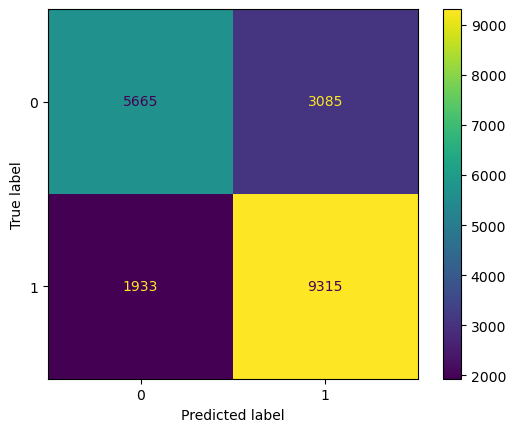

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

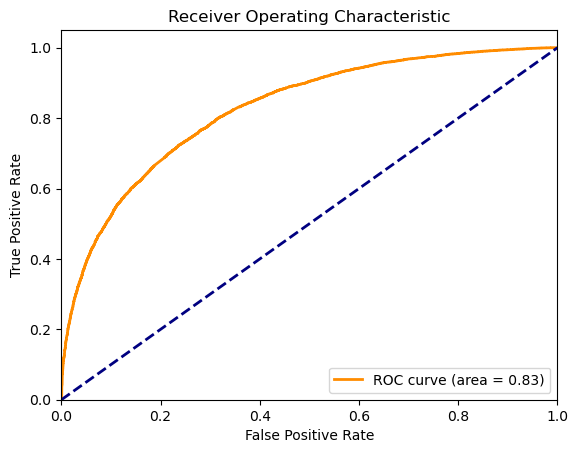

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

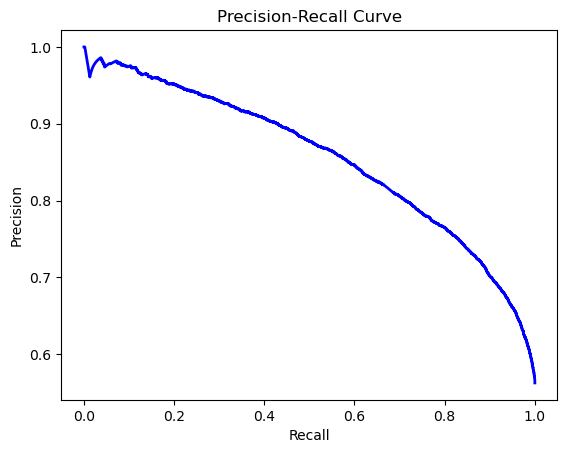

In [22]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])

# Plot the Precision-Recall curve
plt.figure()
plt.plot(recall, precision, lw=2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

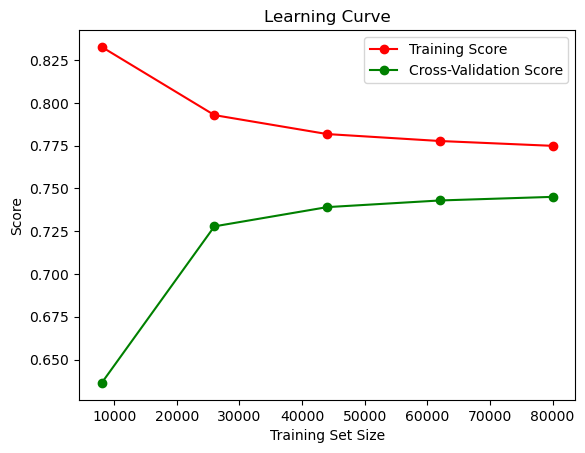

In [23]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5, n_jobs=-1)

# Calculate means and standard deviations
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()